In [1]:
import pandas as pd
import numpy as np
df_fission = pd.read_csv('易速鲜花裂变转化.csv') 
df_fission.head()

,用户码,性别,年龄,城市,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,裂变方案,是否转化
0,1,女,40,杭州,9,2,1,516,6360.66,0.0000,疯狂打折,0
1,2,男,69,杭州,6,2,1,682,28605.00,0.0000,疯狂打折,0
2,3,女,32,杭州,9,1,1,803,10378.09,236311.0932,买一送一,1
3,4,女,37,苏州,0,2,1,778,25564.01,129909.8079,买一送一,1
4,5,男,55,苏州,4,3,0,547,3235.61,136976.1948,买一送一,1


Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 801 ('font.family :sans-serif')
Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 802 ('font.sans-serif :SimHei')
Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 803 ('axes.unicode_minus :False')


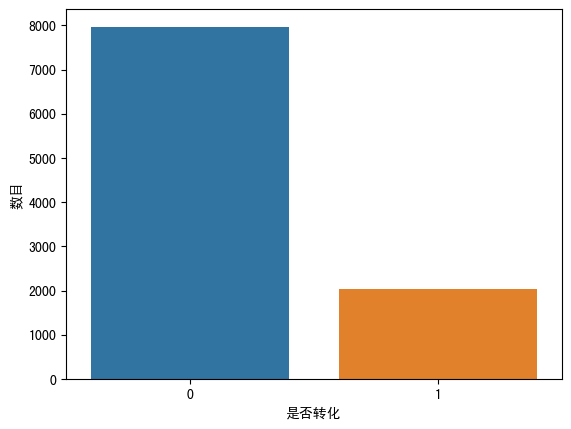

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(x='是否转化',data=df_fission)
fig.set_ylabel('数目')
plt.show()

In [3]:
df_fission['性别'].replace('女',0,inplace=True)
df_fission['性别'].replace('男',1,inplace=True)
print('Gender uniquue values',df_fission['性别'].unique())
df_fission = pd.get_dummies(df_fission,drop_first=True)
df_fission

Gender uniquue values [0 1]


,用户码,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,是否转化,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,1,0,40,9,2,1,516,6360.66,0.0000,0,True,False,True
1,2,1,69,6,2,1,682,28605.00,0.0000,0,True,False,True
2,3,0,32,9,1,1,803,10378.09,236311.0932,1,True,False,False
3,4,0,37,0,2,1,778,25564.01,129909.8079,1,False,True,False
4,5,1,55,4,3,0,547,3235.61,136976.1948,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,49,7,2,1,746,1930.44,0.0000,0,False,False,True
9996,9997,1,36,1,1,0,569,29593.82,82517.8587,0,True,False,False
9997,9998,0,55,7,1,0,850,32841.84,0.0000,1,False,False,True
9998,9999,1,35,5,1,1,529,21564.34,117800.7531,0,False,False,False


In [4]:
X= df_fission.drop(['用户码','是否转化'],axis=1)
y = df_fission.是否转化
X

,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,0,40,9,2,1,516,6360.66,0.0000,True,False,True
1,1,69,6,2,1,682,28605.00,0.0000,True,False,True
2,0,32,9,1,1,803,10378.09,236311.0932,True,False,False
3,0,37,0,2,1,778,25564.01,129909.8079,False,True,False
4,1,55,4,3,0,547,3235.61,136976.1948,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,7,2,1,746,1930.44,0.0000,False,False,True
9996,1,36,1,1,0,569,29593.82,82517.8587,True,False,False
9997,0,55,7,1,0,850,32841.84,0.0000,False,False,True
9998,1,35,5,1,1,529,21564.34,117800.7531,False,False,False


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [32]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (f1_score,confusion_matrix)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(dt)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print('AdaBoost 测试准确率：{:.2f}%'.format(ada.score(X_test,y_test)))
print('AdaBoost 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_pred)))

In [20]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_gbdt_pred = gb.predict(X_test)
print('GBDT 测试准确率：{:.2f}%'.format(gb.score(X_test,y_test)))
print('GBDT 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_gbdt_pred)))

GBDT 测试准确率：0.87%
GBDT 测试F1分数：0.60%


In [21]:
#pip install xgboost

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb_pred = xgb.predict(X_test)
print('XGBBoost 测试准确率：{:.2f}%'.format(xgb.score(X_test,y_test)))
print('XGBBoost 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_xgb_pred)))

XGBBoost 测试准确率：0.85%
XGBBoost 测试F1分数：0.58%


In [27]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)
y_dt_pred = dt1.predict(X_test)
print('决策树 测试准确率：{:.2f}%'.format(dt1.score(X_test,y_test)))
print('决策树 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_dt_pred)))

bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(X_train,y_train)
y_bdt_pred = dt1.predict(X_test)
print('决策树Bagging 测试准确率：{:.2f}%'.format(bdt.score(X_test,y_test)))
print('决策树Bagging 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_bdt_pred)))



决策树 测试准确率：0.80%
决策树 测试F1分数：0.52%
决策树Bagging 测试准确率：0.85%
决策树Bagging 测试F1分数：0.52%


In [30]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)
print('随机森林 测试准确率：{:.2f}%'.format(rf.score(X_test,y_test)))
print('随机森林 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_rf_pred)))

随机森林 测试准确率：0.86%
随机森林 测试F1分数：0.59%


In [33]:
ext = ExtraTreesClassifier()
ext.fit(X_train,y_train)
y_ext_pred = ext.predict(X_test)
print('极端随机森林 测试准确率：{:.2f}%'.format(ext.score(X_test,y_test)))
print('极端随机森林 测试F1分数：{:.2f}%'.format(f1_score(y_test,y_ext_pred)))

极端随机森林 测试准确率：0.85%
极端随机森林 测试F1分数：0.55%
